In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv('test.csv')

In [60]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [61]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [62]:
# Check for missing values
train_data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [63]:
# Replacing NaN values with 'No' for features where missing values indicate 'None' (e.g., no basement, no garage).
# This ensures that categorical features with missing values are treated as 'No' where applicable.
nan_to_no = ['MasVnrType','Alley', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType','GarageFinish', 'GarageQual', 'GarageCond','PoolQC',  'Fence']

def nan_to_no_conversion(data_frame,column_name):
    data_frame[column_name] = data_frame[column_name].fillna('No')
    data_frame[column_name] = data_frame[column_name].apply(lambda x: x.capitalize() if isinstance(x, str) else x)
    return data_frame

for column in nan_to_no:
    train_data = nan_to_no_conversion(train_data, column)
for column in nan_to_no:
    test_data = nan_to_no_conversion(test_data,column)

In [64]:
# Check for missing values
train_data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

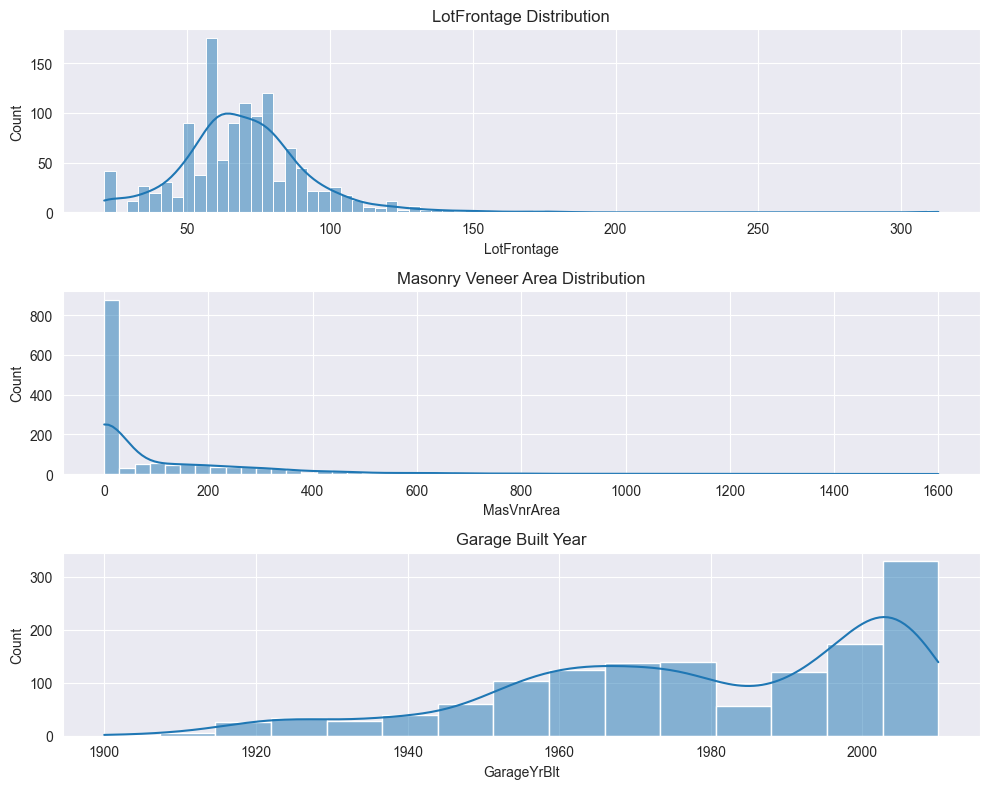

In [65]:
# Checking for missing type of numeric values as mean or median based on the distribution of the column values
# First with LotFrontage

fig, axes = plt.subplots(3, 1, figsize=(10,8))
sns.histplot(train_data['LotFrontage'], kde=True, ax=axes[0])  # Indexing with axes[0] since it's a 1D array
axes[0].set_title('LotFrontage Distribution')

# Second plot for MasVnrArea
sns.histplot(train_data['MasVnrArea'], kde=True, ax=axes[1])  # Indexing with axes[1]
axes[1].set_title('Masonry Veneer Area Distribution')

# Third plot for GarageYrBuilt
sns.histplot(train_data['GarageYrBlt'],kde=True, ax=axes[2])
axes[2].set_title("Garage Built Year")

plt.tight_layout()

In [66]:
# Applying Median to the numeric columns since they are fully skewed data.
# With this approach, the data is not affected by the extreme outliers. 

train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].median())
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].median())
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median())

test_data['LotFrontage'] = test_data['LotFrontage'].fillna(test_data['LotFrontage'].median())
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].median())
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].median())

In [67]:
category_columns = train_data.select_dtypes(include=['object'])

category_columns.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [68]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

one_hot_encoder = OneHotEncoder()
label_encoder = LabelEncoder()

nominal_columns = ['MSSubClass','MSZoning','Street','Alley','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                    'Foundation','Heating','CentralAir','Electrical','Functional','GarageType','PavedDrive','MiscFeature','SaleType']
ordinal_column = ['LotShape','LandContour','Utilities','LandSlope','MasVnrType','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu',
                  'GarageFinish','GarageQual','GarageCond','PoolQC','Fence','SaleCondition']

# Nominal Encoding with OneHotEncoder
train_data_nominal_encoded = pd.get_dummies(train_data[nominal_columns], drop_first=False)

# Ordinal Encoding with LabelEncoder
train_data_ordinal = pd.DataFrame()
for col in ordinal_column:
    # Preserving the original column name with '_encoded'
    train_data_ordinal[col + '_encoded'] = label_encoder.fit_transform(train_data[col])

# Combine the encoded nominal and ordinal columns into a single dataframe
chi2_dataframe = pd.concat([train_data_nominal_encoded, train_data_ordinal], axis=1)

# Perform chi2 test
from sklearn.feature_selection import chi2
chi2_values, p_values = chi2(chi2_dataframe, train_data['SalePrice'])

# Create the chi2_df with individual one-hot encoded features
chi2_df = pd.DataFrame({
    'Feature': chi2_dataframe.columns,
    'Chi2 Value': chi2_values,
    'P-value': p_values
}).sort_values(by='P-value')

# Group by the original feature name (splitting by the '_' character for nominal features)
# For nominal columns, sum the chi-square values of all their categories
chi2_df['Base Feature'] = chi2_df['Feature'].str.split('_').str[0]  # Extract the base feature name for nominal
chi2_grouped = chi2_df.groupby('Base Feature').agg({
    'Chi2 Value': 'sum',  # Sum chi2 values for each base feature
    'P-value': 'min'  # Take the smallest p-value for each base feature
}).sort_values(by='P-value')

# Formatting the results
chi2_grouped['P-value'] = chi2_grouped['P-value'].apply(lambda x: '{:.4f}'.format(x))
chi2_grouped['Chi2 Value'] = chi2_grouped['Chi2 Value'].apply(lambda x: '{:.4f}'.format(x))

# Display the grouped dataframe to ensure it shows the base features
chi2_grouped

print(chi2_grouped.keys)

<bound method NDFrame.keys of                Chi2 Value P-value
Base Feature                     
MSSubClass     19281.2326  0.0000
HeatingQC       1483.1449  0.0000
Exterior2nd     9785.8260  0.0000
Exterior1st     8712.7328  0.0000
Condition2      4772.6102  0.0000
Heating         4201.3880  0.0000
SaleType        6099.7945  0.0000
Neighborhood   16898.7558  0.0000
MSZoning        3147.8911  0.0000
BsmtFinType1    1038.1322  0.0000
Foundation      3669.1922  0.0000
LandSlope        889.7938  0.0000
Street           888.3130  0.0000
HouseStyle      4596.7894  0.0000
RoofMatl        3146.4669  0.0000
GarageType      4107.9612  0.0000
RoofStyle       2665.6802  0.0000
LotShape         802.9729  0.0001
MiscFeature     2072.2493  0.0007
CentralAir       826.8569  0.0018
Electrical      2767.0360  0.0152
Condition1      4147.6185  0.0580
LotConfig       2771.9855  0.1216
Functional      3073.9217  0.2515
Alley           1233.0759  0.3855
PavedDrive      1204.7749  0.4614
GarageFinish     6

In [79]:
selected_features = ['MSSubClass','HeatingQC','Exterior2nd','Exterior1st','Condition2','Heating','SaleType','Neighborhood','MSZoning','BsmtFinType1','Foundation',
                     'LandSlope','Street','HouseStyle','RoofMatl','GarageType','RoofStyle','LotShape','MiscFeature','CentralAir','Electrical']

# Function to apply the preprocessing steps to both train and test data
def preprocess_data(data, nominal_columns, ordinal_columns, selected_features):
    # Create empty dataframes for the selected nominal and ordinal features
    nominal_features = pd.DataFrame()
    ordinal_features = pd.DataFrame()

    # One-hot encode the nominal features
    for feature in selected_features:
        if feature in nominal_columns:
            one_hot_columns = [col for col in data.columns if col.startswith(feature)]
            # Add these one-hot encoded columns to the new dataframe
            nominal_features = pd.concat([nominal_features, data[one_hot_columns]], axis=1)

    # Label encode the ordinal features
    for feature in selected_features:
        if feature in ordinal_columns:
            ordinal_features[feature + '_encoded'] = label_encoder.fit_transform(data[feature])
    
    # Select numeric columns
    numeric_columns = data.select_dtypes(include='number')

    # Ensure that all dataframes have aligned indices
    nominal_features.reset_index(drop=True, inplace=True)
    ordinal_features.reset_index(drop=True, inplace=True)
    numeric_columns.reset_index(drop=True, inplace=True)

    # Concatenate nominal, ordinal, and numeric features into the final dataframe
    processed_data = pd.concat([nominal_features, ordinal_features], axis=1)
    processed_data = pd.concat([numeric_columns])

    return processed_data

# Apply the preprocessing to the training data
latest_training_data = preprocess_data(train_data, nominal_columns, ordinal_column, selected_features)

# Apply the same preprocessing to the test data
latest_test_data = preprocess_data(test_data, nominal_columns, ordinal_column, selected_features)

# Display the head of the processed training and test data
print(latest_training_data.head())
print(latest_test_data.head())


   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0

In [80]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state=42)

regressor.fit(latest_training_data.iloc[:,:-1], latest_training_data.iloc[:,-1])

RandomForestRegressor(random_state=42)

In [92]:
# Predict the SalePrice for the test data (features only)
predictions = regressor.predict(latest_test_data)  # Ensure only features are passed

# Assuming the test_data has an 'Id' column, we'll extract it
test_ids = test_data['Id']

# Create a new DataFrame with 'Id' and 'SalePrice'
output_df = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': predictions
})

# Display the first few rows of the output
print(output_df.head())

# If you want to save it to a CSV file
output_df.to_csv('predictions_output.csv', index=False)

     Id  SalePrice
0  1461  131379.00
1  1462  155276.90
2  1463  185064.72
3  1464  183140.32
4  1465  198032.87
